# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [131]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
import json

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [132]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [164]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:500]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #1
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        
        
        # Step 2:
        response = requests.get(city_url)
        
        # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            city_weather= response.json()
        else:
            city_weather= {} # failed request()
        
        # Parse the JSON and retrieve data
        #city_weather = request.get(city_url).json()
         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main",{}).get("temp_max")
        city_humidity = city_weather.get("main",{}).get("humidity")
        city_clouds = city_weather.get("clouds",{}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys",{}).get("country")
        city_date = city_weather.get("dt",None)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | kaltungo
Processing Record 6 of Set 1 | tralee
Processing Record 7 of Set 1 | thinadhoo
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | flying fish cove
Processing Record 11 of Set 1 | colonia
Processing Record 12 of Set 1 | atafu village
Processing Record 13 of Set 1 | magadan
Processing Record 14 of Set 1 | freetown
Processing Record 15 of Set 1 | alice springs
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | san antonio de pale
Processing Record 18 of Set 1 | al jawf
Processing Record 19 of Set 1 | mil'kovo
Processing Record 20 of Set 1 | snowflake
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | yellowk

In [165]:
city_url

'https://api.openweathermap.org/data/2.5/weather?appid=5e475228f9ddfca1ec4b8d458f7cbc6e&units=imperial&q=snyder'

In [166]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          500
Lat           483
Lng           483
Max Temp      483
Humidity      483
Cloudiness    483
Wind Speed    483
Country       483
Date          483
dtype: int64

In [167]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,35.76,78.0,99.0,27.60,TF,1.717451e+09
1,blackmans bay,-43.0167,147.3167,48.33,96.0,0.0,1.01,AU,1.717451e+09
2,wailua homesteads,22.0669,-159.3780,81.03,82.0,100.0,14.97,US,1.717451e+09
3,bethel,41.3712,-73.4140,84.63,37.0,75.0,4.61,US,1.717451e+09
4,kaltungo,9.8142,11.3089,84.13,54.0,55.0,7.85,NG,1.717451e+09


In [168]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [169]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,35.76,78.0,99.0,27.60,TF,1.717451e+09
1,blackmans bay,-43.0167,147.3167,48.33,96.0,0.0,1.01,AU,1.717451e+09
2,wailua homesteads,22.0669,-159.3780,81.03,82.0,100.0,14.97,US,1.717451e+09
3,bethel,41.3712,-73.4140,84.63,37.0,75.0,4.61,US,1.717451e+09
4,kaltungo,9.8142,11.3089,84.13,54.0,55.0,7.85,NG,1.717451e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

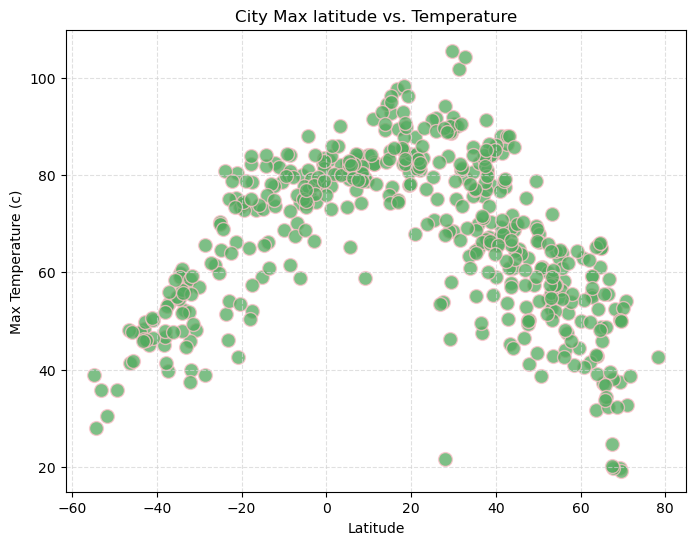

In [170]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], color='#52AA5E', alpha=0.75,edgecolor="pink",s=100)

plt.title("City Max latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")


plt.grid(color="lightgrey",linestyle="--",alpha=0.7)

# Save the figure
plt.savefig("../output_data/latvs_temp.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

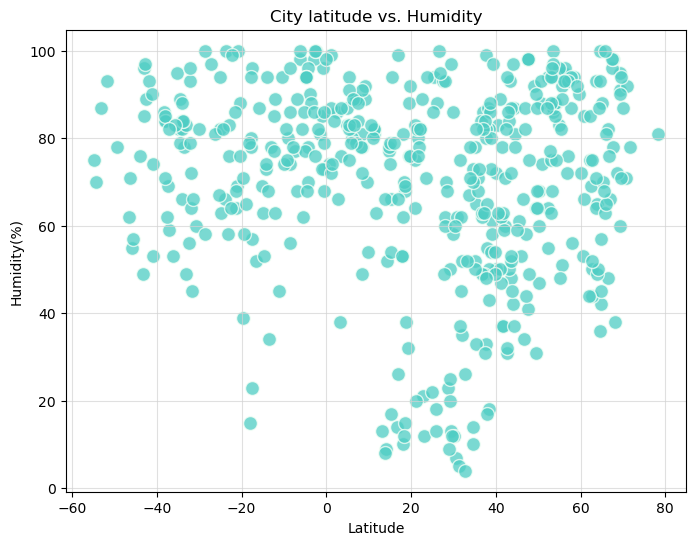

In [171]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], color='#4ECDC4', alpha=0.75,edgecolor="#F7FFF7",s=100)

plt.title("City latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")


plt.grid(color="lightgrey",linestyle="-", alpha=0.7)
# Save the figure
plt.savefig("../output_data/latvs_hum.png")


# Show plot
plt.show()

#### Latitude Vs. Cloudiness

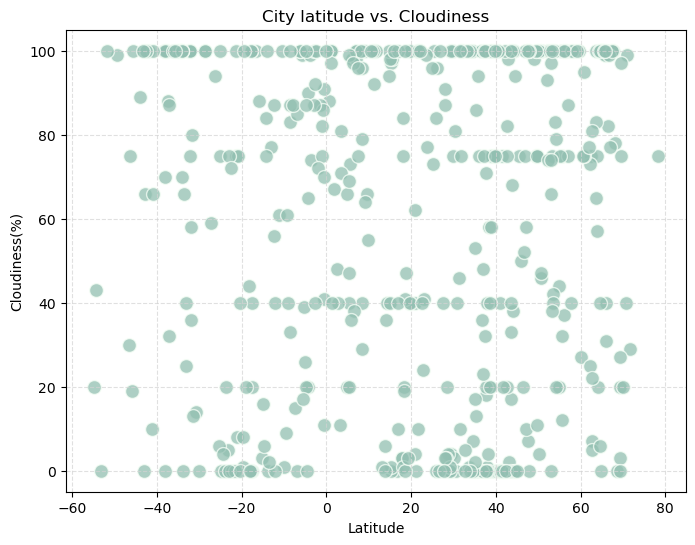

In [172]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], color='#92BFB1', alpha=0.75,edgecolor="#F7FFF7",s=100)

plt.title("City latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")


plt.grid(color="lightgrey",linestyle="--", alpha=0.7)
# Save the figure
plt.savefig("../output_data/latvs_cloud.png")


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

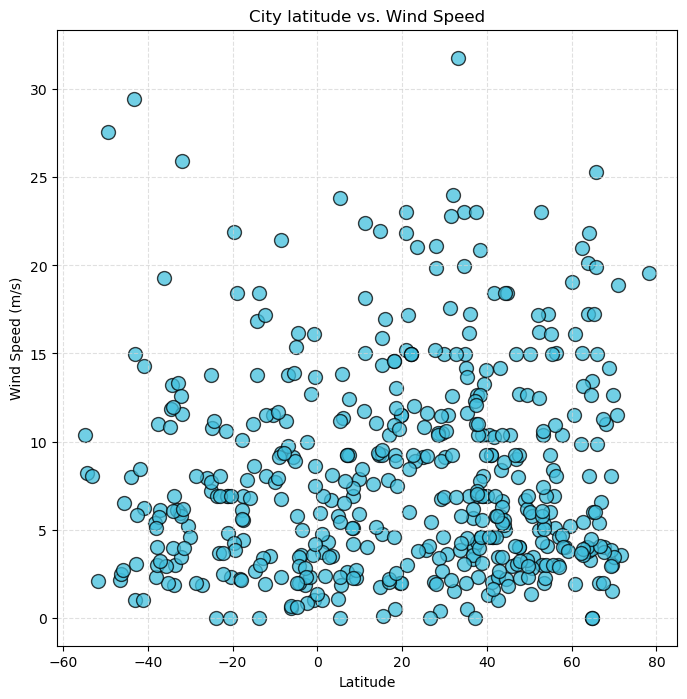

In [173]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 8))
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], color='#42BFDD', alpha=0.75,edgecolor="black",s=100)

plt.title("City latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")


plt.grid(color="lightgrey",linestyle="--", alpha=0.7)
# Save the figure
plt.savefig("../output_data/latvs_wind.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [174]:
# Define a function to create Linear Regression plots

def linear_regression(x_values,y_values,title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculate the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
    plt.figure(figsize=(10, 10))
    plt.scatter(x_values, y_values, facecolor="yellow", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") # plot the line of best fit
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

    plt.ylabel(title, fontsize=12, fontstyle="italic")
    plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
    plt.annotate(line_eq,(10, 60),fontsize=15,color="black")
    plt.annotate(line_eq,(-25, 60),fontsize=15,color="black")

    print(f"The r-squared is: {rvalue**2}")
    plt.show()


In [175]:
df_north = city_data_df.loc[city_data_df.Lat>=0]

northern_hemi_df=pd.DataFrame(df_north)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,wailua homesteads,22.0669,-159.3780,81.03,82.0,100.0,14.97,US,1.717451e+09
3,bethel,41.3712,-73.4140,84.63,37.0,75.0,4.61,US,1.717451e+09
4,kaltungo,9.8142,11.3089,84.13,54.0,55.0,7.85,NG,1.717451e+09
5,tralee,52.2704,-9.7026,54.57,94.0,100.0,4.97,IE,1.717451e+09
6,thinadhoo,0.5333,72.9333,83.14,74.0,88.0,5.93,MV,1.717451e+09


In [176]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
df_south= city_data_df.loc[city_data_df.Lat<0]

southern_hemi_df=pd.DataFrame(df_south)

# Display sample data
southern_hemi_df.head()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,35.76,78.0,99.0,27.60,TF,1.717451e+09
1,blackmans bay,-43.0167,147.3167,48.33,96.0,0.0,1.01,AU,1.717451e+09
7,hermanus,-34.4187,19.2345,59.81,89.0,100.0,13.20,ZA,1.717451e+09
8,adamstown,-25.0660,-130.1015,70.34,82.0,100.0,7.20,PN,1.717451e+09
9,flying fish cove,-10.4217,105.6791,78.48,94.0,100.0,11.50,CX,1.717451e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5469050902969652


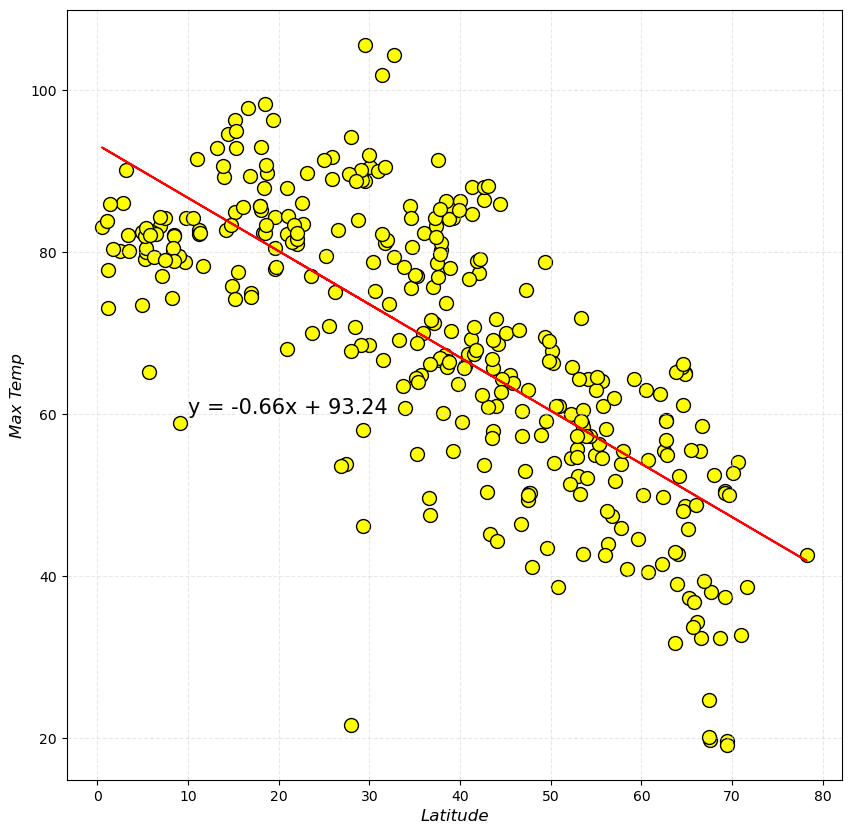

In [177]:
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], "Max Temp")


The r-squared is: 0.7166651616816002


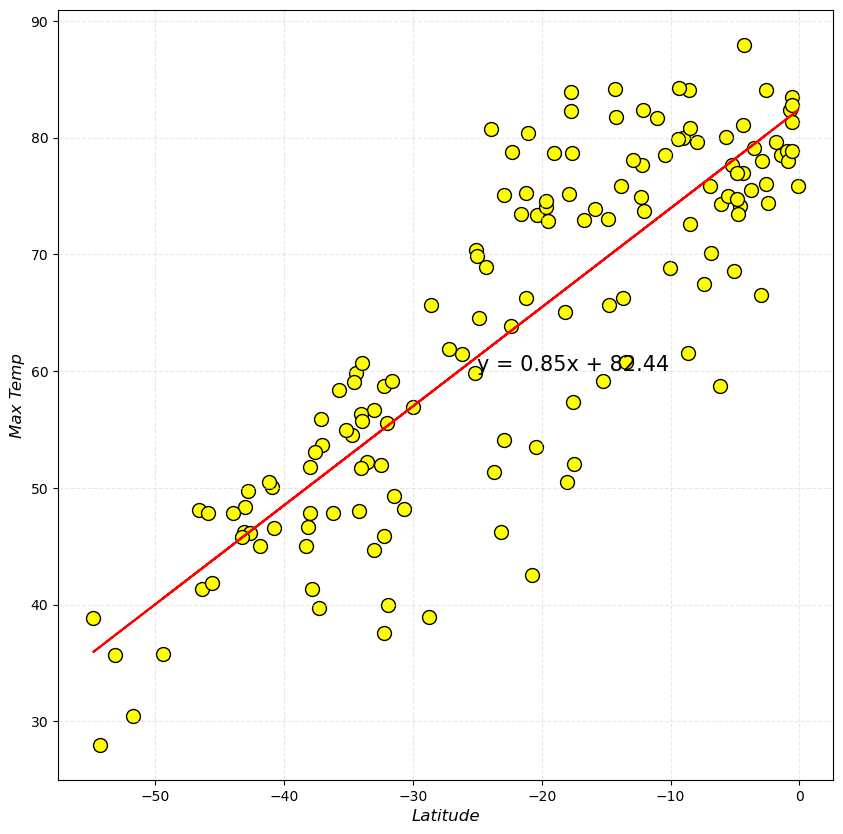

In [178]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], "Max Temp")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.012090270292303036


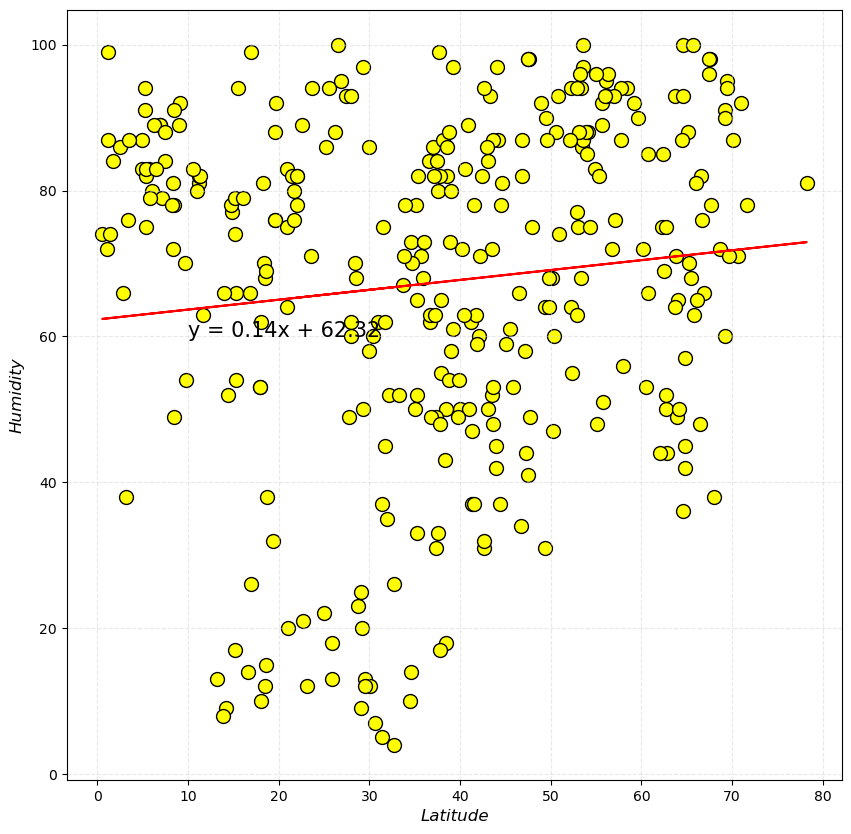

In [179]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], "Humidity")

The r-squared is: 0.0138663161056534


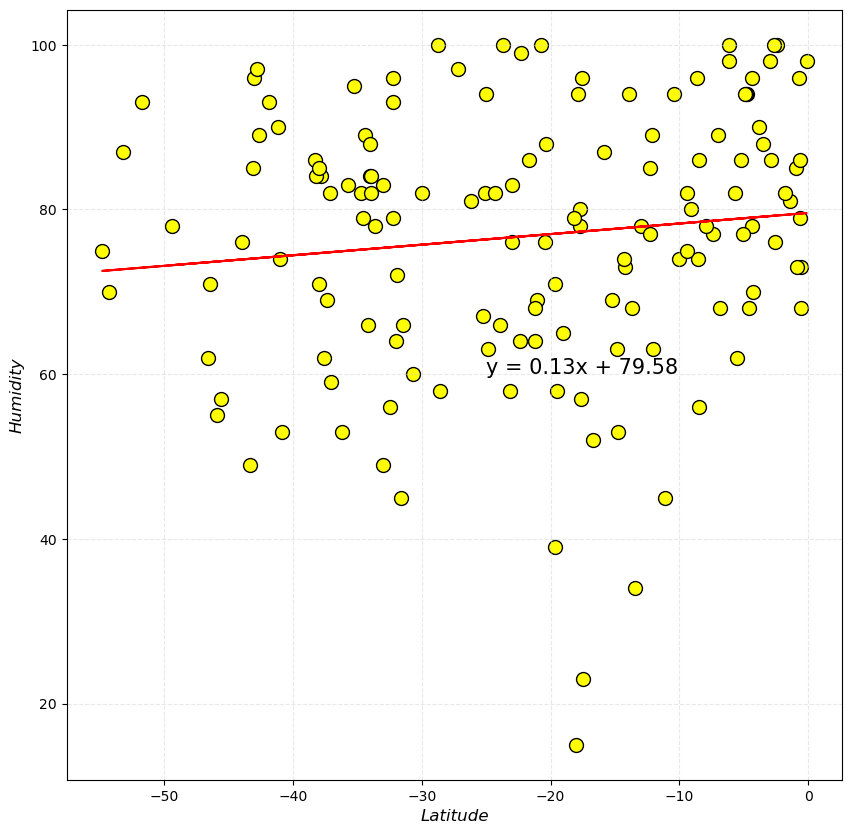

In [180]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.002187648358867258


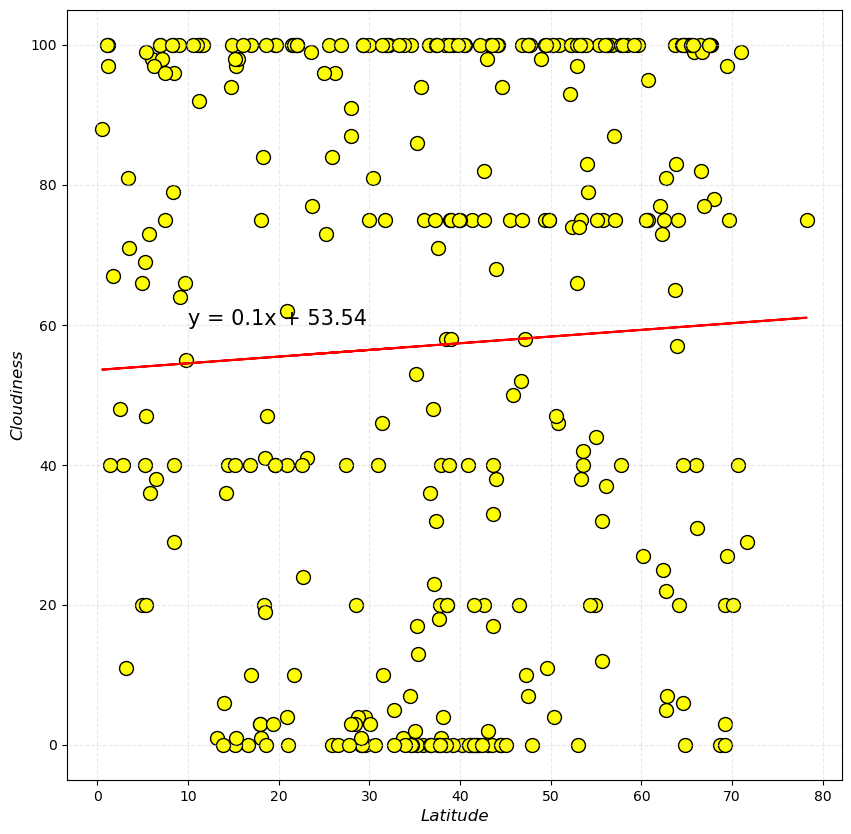

In [181]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], "Cloudiness")

The r-squared is: 0.003617062007885952


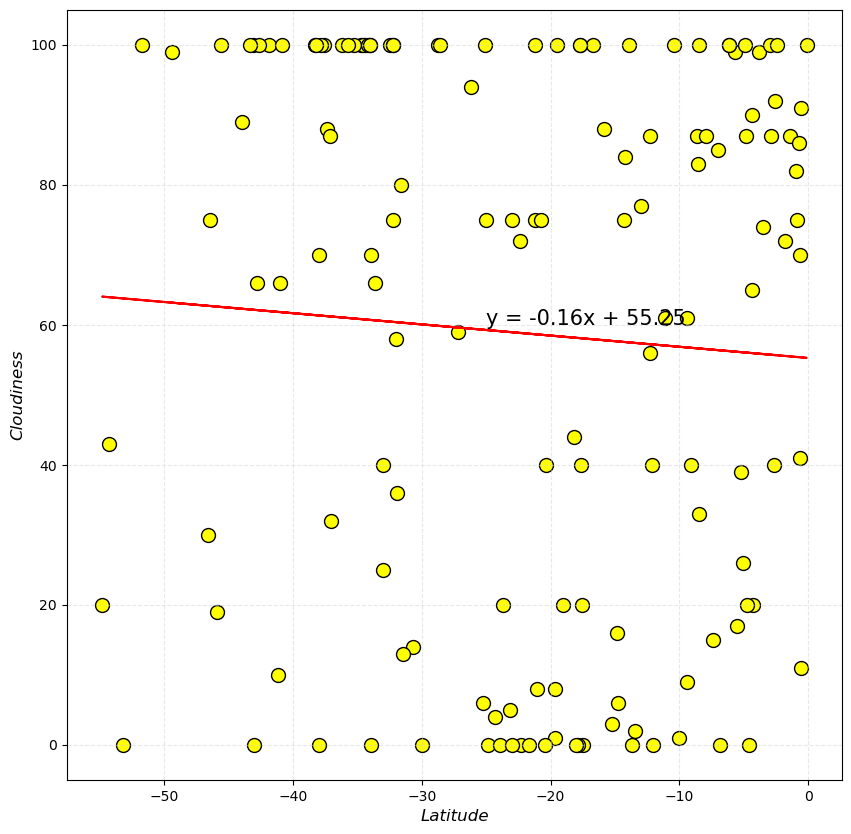

In [182]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 2.0689418033145353e-05


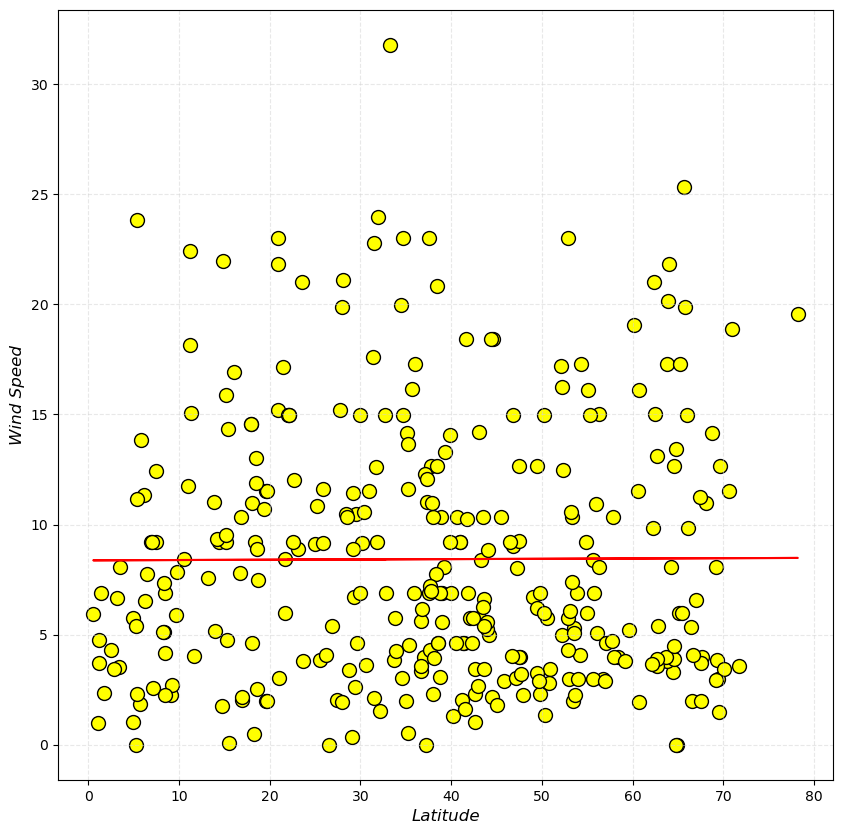

In [183]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], "Wind Speed")

The r-squared is: 0.003021094442077674


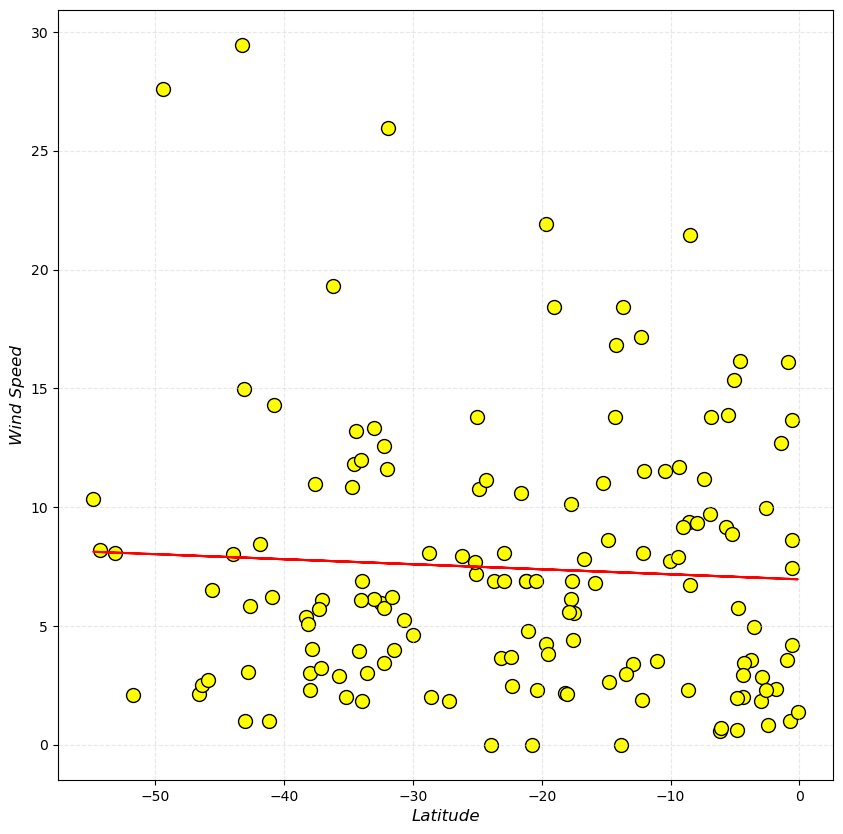

In [184]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE